Check whether the Silver and Chan (1991) coefficients for their implementation of Parseval's theorem is correct for digitised data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy import stats

Parsevals theorem when applied to discrete Fourier Transform looks like this.

$\sum _{n=0}^{N-1}|x[n]|^{2}={\frac {1}{N}}\sum _{k=0}^{N-1}|X[k]|^{2}$

Source: https://en.wikipedia.org/wiki/Parseval%27s_theorem

In [57]:
# check Parseval's theorem holds numerically 
nsamps=1000

# window
w = signal.tukey(nsamps,0.1)

a = np.random.normal(0,1,nsamps) * w
A = np.fft.fft(a)
b = (1/np.sqrt(2*np.pi))*(signal.gaussian(nsamps,10))
B = np.fft.fft(b)
c = np.convolve(a,b,'same')
C = np.fft.fft(c)

# signal c is convolution of Gaussian noise (a) with a Gaussian wavelet (b)
# C is the fourier transform of c.

sumt = np.sum(c**2)
sumf = np.sum(np.abs(C)**2)/nsamps

print('time domain',sumt)
print('fourier domain',sumf)
print('difference',np.abs(sumt-sumf))
print('percent', (np.abs(sumt-sumf)/sumt)*100)



time domain 2778.93808225
fourier domain 2778.93808225
difference 9.09494701773e-13
percent 3.27281384059e-14


Furthermore by the convolution theorem: C = A \* B.
And therefore sum(C^2) = sum(A^2 * B^2)

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


sum A*B 2779.02384468
difference 0.0857624340774
percent 0.00308615850872


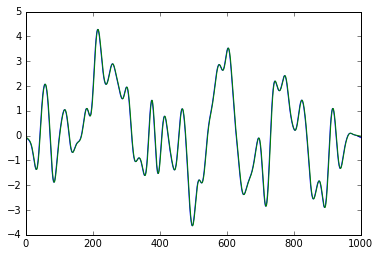

In [58]:
AB = A * B
ab = np.fft.ifft(AB)
plt.plot(np.roll(ab,500))
plt.plot(c)

sumAB = np.sum(np.abs(A**2*B**2))/nsamps
print('sum A*B',sumAB)
print('difference',np.abs(sumt-sumAB))
print('percent',(np.abs(sumt-sumAB)/sumt)*100)

Parsevals theorem as applied in Silver and Chan (and Walsh).

$\sum _{n=0}^{N-1}|x[n]|^{2}={\frac {1}{N}}\sum _{k=1}^{N-2}|X[k]|^{2}+\frac{1}_{2}\sum|X[0,N-1]|$

Source: https://en.wikipedia.org/wiki/Parseval%27s_theorem

In [68]:
def ndf(y,taper=True,detrend=True):
    """
    Uses the improvement found by Walsh et al (2013).
    By default will detrend data to ensure zero mean
    and will taper edges using a Tukey filter affecting amplitudes of 5% of data at edges
    """

    if taper is True:
        y = y * signal.tukey(y.size,0.05)
        
    if detrend is True:
        # ensure no trend on the noise trace
        y = signal.detrend(y)

  
    Y = np.fft.fft(y)
    amp = np.absolute(Y)
    
    # estimate E2 and E4 following Walsh et al (2013)
    a = np.ones(Y.size)
    a[0] = a[-1] = 0.5
    E2 = np.sum( a * amp**2)
    E4 = (np.sum( (4 * a**2 / 3) * amp**4))
    
    ndf = 2 * ( 2 * E2**2 / E4 - 1 )
    
    return ndf
    
def ndf2(y,taper=True,detrend=True):
    """
    
    """

    if taper is True:
        y = y * signal.tukey(y.size,0.05)
        
    if detrend is True:
        # ensure no trend on the noise trace
        y = signal.detrend(y)

  
    Y = np.fft.fft(y)
    amp = np.absolute(Y)**2
    
    E2 = np.sum(amp**2)
    E4 = (np.sum( (4/3) * amp**4))
    
    ndf = 2 * ( 2 * E2**2 / E4 - 1 )
    
    return ndf

In [69]:
print(ndf(c))

48.3596763722


In [70]:
print(ndf2(c))

48.444600887


In [72]:
stats.moment(c,moment=4)

18.130707772254976